In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names1=['Identificador','Numero_agentes','Tipo_red','Agente','Ronda','Estado','Puntaje','Politica','Parametro-0','Parametro-1','Politica_lag','Consistencia']
data = pd.read_csv('simulacionesKregular2.csv',names=names1,header=None)

In [3]:
print(data.shape)
data.head()

(1133000, 12)


,Identificador,Numero_agentes,Tipo_red,Agente,Ronda,Estado,Puntaje,Politica,Parametro-0,Parametro-1,Politica_lag,Consistencia
0,600,5,Kregular,0,0,1,1,0,5,2,NaN,NaN
1,600,5,Kregular,0,10,0,0,4,5,2,0.0,0.0
2,600,5,Kregular,0,20,0,0,4,5,2,4.0,1.0
3,600,5,Kregular,0,30,0,0,4,5,2,4.0,1.0
4,600,5,Kregular,0,40,0,0,4,5,2,4.0,1.0


In [4]:
data_full = data.query('Tipo_red=="Kregular"').copy()

In [5]:
data_full.Numero_agentes.unique()

array([   5,    6,   10,   11,  101, 1000])

In [6]:
experimentos = data_full.groupby('Numero_agentes')['Identificador'].unique()
experimentos = experimentos.apply(len)
experimentos

Numero_agentes
5       100
6       100
10      100
11      100
101     100
1000    100
Name: Identificador, dtype: int64

Medida de asistencia óptima al bar El Farol:

Es un número entre 0 y 1, donde 1 significa que en todas las rondas, la asistencia al bar fue de 0.5; 0 significa que o bien la asistencia en todas las rondas fue 0 o 1.

$$ 1 - 2*\sqrt{\frac{\sum_{r}(Asistencia_{r} - 0.5)^2}{R}}$$

In [7]:
aux = data_full.groupby(['Numero_agentes', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Numero_agentes',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/aux['Numero_agentes']
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (aux['Asistencia'] - 0.5)*(aux['Asistencia'] - 0.5)
aux.head()

,Numero_agentes,Identificador,Ronda,Asistencia_total,Asistencia,diferencia_con_umbral
0,5,600,0,2,0.4,0.01
1,5,600,10,0,0.0,0.25
2,5,600,20,0,0.0,0.25
3,5,600,30,0,0.0,0.25
4,5,600,40,0,0.0,0.25


In [8]:
num_rondas = aux.Ronda.max() + 1
num_rondas

91

In [9]:
fig = plt.figure(figsize=(10,10))
contador = 1
for n,grp in data_recomp.groupby('Numero_agentes'):
    ax = fig.add_subplot(2,3,contador)
    grp['Puntaje promedio'].hist(bins = 20)
    ax.set_title('Numero de agentes '+str(n))
    contador += 1
    #ax.set_xlim([0.5,1])
    ax.set_xlabel('Puntaje Promedio')
    ax.set_ylabel('Frecuencia')

NameError: name 'data_recomp' is not defined

<Figure size 720x720 with 0 Axes>

In [10]:
df = aux.groupby(['Numero_agentes', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = df['diferencia_con_umbral']/num_rondas
df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
df.head()

,Numero_agentes,Identificador,diferencia_con_umbral,Asistencia_optima
0,5,600,2.26,0.684816
1,5,601,0.18,0.911050
2,5,602,0.90,0.801102
3,5,603,2.26,0.684816
4,5,604,0.10,0.933701


In [11]:
df['Asistencia_optima'].describe()

count    600.000000
mean       0.896184
std        0.097230
min        0.668503
25%        0.851750
50%        0.933701
75%        0.971656
max        1.000000
Name: Asistencia_optima, dtype: float64

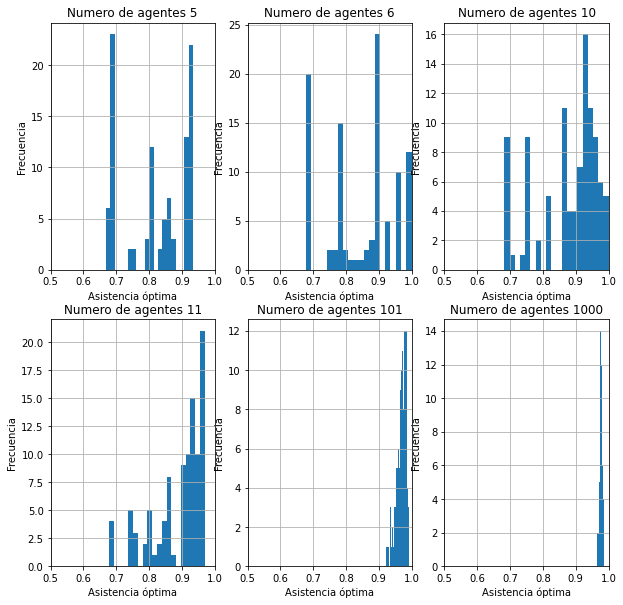

In [12]:
fig = plt.figure(figsize=(10,10))
contador = 1
for n,grp in df.groupby('Numero_agentes'):
    ax = fig.add_subplot(2,3,contador)
    grp['Asistencia_optima'].hist(bins = 20)
    ax.set_title('Numero de agentes '+str(n))
    contador += 1
    ax.set_xlim([0.5,1])
    ax.set_xlabel('Asistencia óptima')
    ax.set_ylabel('Frecuencia')

Text(0, 0.5, 'Promedio asistencia óptima\nsobre 100 simulaciones')

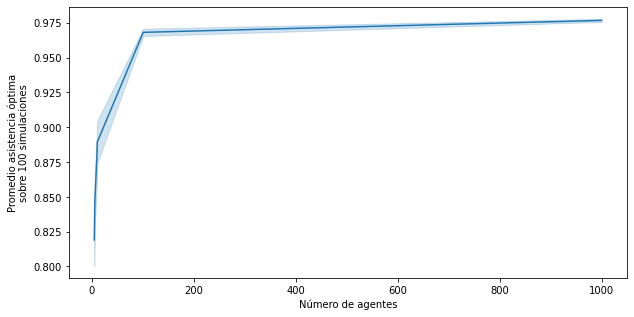

In [13]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x=df['Numero_agentes'], y=df['Asistencia_optima'])
plt.xlabel('Número de agentes')
plt.ylabel('Promedio asistencia óptima\nsobre 100 simulaciones')

Medida de recompensa total:

$$\frac{\sum_{a, r} recompensa(a, r)}{A*R}$$

In [14]:
data_recomp = data.groupby(['Numero_agentes', 'Identificador'])["Puntaje"].sum().reset_index()
data_recomp["Puntaje promedio"]=data_recomp["Puntaje"]/(num_rondas*data_recomp["Numero_agentes"])
data_recomp['Puntaje promedio'].describe()


count    600.000000
mean      -0.011931
std        0.041743
min       -0.109890
25%       -0.042730
50%       -0.003699
75%        0.018654
max        0.054945
Name: Puntaje promedio, dtype: float64

Text(0, 0.5, 'Promedio puntaje \nsobre 100 simulaciones')

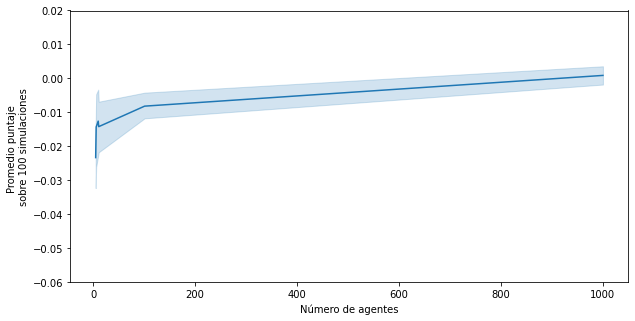

In [15]:
fig = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=data_recomp['Numero_agentes'], y=data_recomp['Puntaje promedio'])
ax.set(ylim = [-0.06,0.02])
plt.xlabel('Número de agentes')
plt.ylabel('Promedio puntaje \nsobre 100 simulaciones')

In [21]:
data_recomp_aux = data.groupby(['Numero_agentes', 'Identificador','Agente'])["Puntaje"].sum().reset_index()
data_recomp_aux.tail()

,Numero_agentes,Identificador,Agente,Puntaje
113295,1000,1199,995,-1
113296,1000,1199,996,1
113297,1000,1199,997,-4
113298,1000,1199,998,-3
113299,1000,1199,999,0


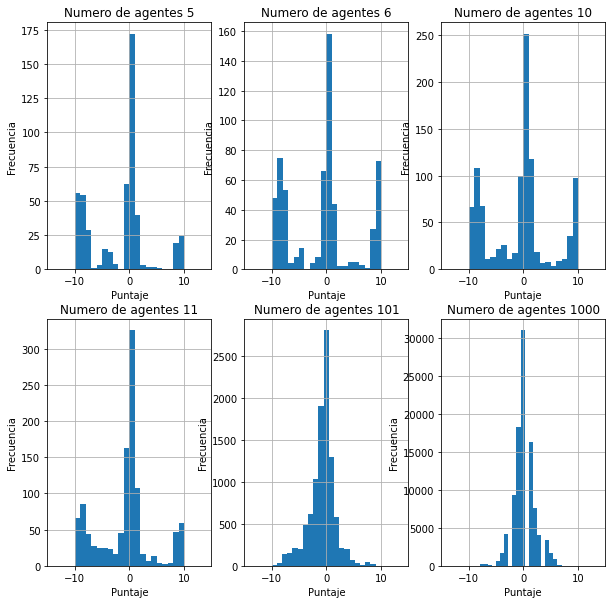

In [25]:
fig = plt.figure(figsize=(10,10))
contador = 1
for n,grp in data_recomp_aux.groupby('Numero_agentes'):
    ax = fig.add_subplot(2,3,contador)
    grp['Puntaje'].hist(bins = 20)
    ax.set_title('Numero de agentes '+str(n))
    contador += 1
    ax.set_xlim([-15,15])
    ax.set_xlabel('Puntaje')
    ax.set_ylabel('Frecuencia')

In [26]:
data_recomp_aux = data.groupby(['Numero_agentes', 'Identificador','Agente'])["Estado"].sum().reset_index()
data_recomp_aux.tail()

,Numero_agentes,Identificador,Agente,Estado
113295,1000,1199,995,5
113296,1000,1199,996,1
113297,1000,1199,997,8
113298,1000,1199,998,5
113299,1000,1199,999,0


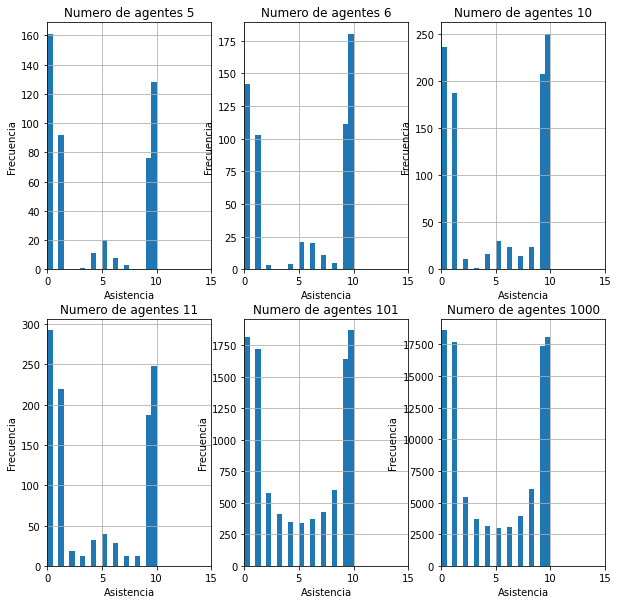

In [29]:
fig = plt.figure(figsize=(10,10))
contador = 1
for n,grp in data_recomp_aux.groupby('Numero_agentes'):
    ax = fig.add_subplot(2,3,contador)
    grp['Estado'].hist(bins = 20)
    ax.set_title('Numero de agentes '+str(n))
    contador += 1
    ax.set_xlim([0,15])
    ax.set_xlabel('Asistencia')
    ax.set_ylabel('Frecuencia')

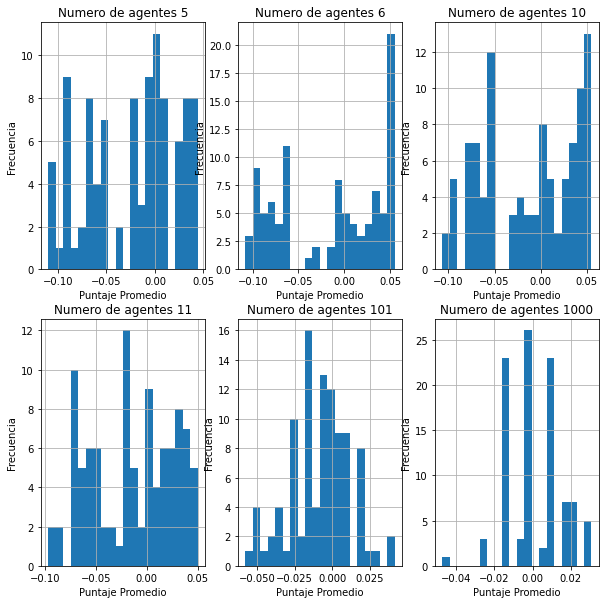

In [28]:
fig = plt.figure(figsize=(10,10))
contador = 1
for n,grp in data_recomp.groupby('Numero_agentes'):
    ax = fig.add_subplot(2,3,contador)
    grp['Puntaje promedio'].hist(bins = 20)
    ax.set_title('Numero de agentes '+str(n))
    contador += 1
    #ax.set_xlim([,])
    ax.set_xlabel('Puntaje Promedio')
    ax.set_ylabel('Frecuencia')

In [40]:
data_disper = data.groupby(['Numero_agentes', 'Identificador','Agente']).agg({'Puntaje':'sum','Estado':'sum'}).reset_index()
data_disper.tail()

,Numero_agentes,Identificador,Agente,Puntaje,Estado
113295,1000,1199,995,-1,5
113296,1000,1199,996,1,1
113297,1000,1199,997,-4,8
113298,1000,1199,998,-3,5
113299,1000,1199,999,0,0


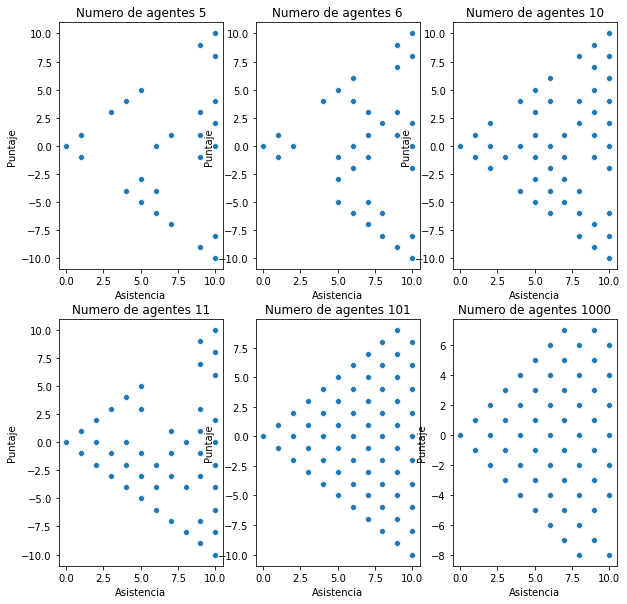

In [43]:
fig = plt.figure(figsize=(10,10))
contador = 1
for n,grp in data_disper.groupby('Numero_agentes'):
    ax = fig.add_subplot(2,3,contador)
    sns.scatterplot(x='Estado',y='Puntaje',data=grp)
    ax.set_title('Numero de agentes '+str(n))
    contador += 1
    #ax.set_xlim([,])
    ax.set_xlabel('Asistencia')
    ax.set_ylabel('Puntaje')

Medida de equidad en al distribución de recursos:

Índice de Gini:
$X_{j}$ : Puntaje acumulado del agente $j$  
$$N+1-2\frac{\sum_{i=1}^N\sum_{j=1}^i X_{j}}{\sum_{k=1}^N X_{k}}$$

In [ ]:
def gini(x):
        # The rest of the code requires numpy arrays.
        x = np.asarray(x) #convierte x en un vector
        sorted_x = np.sort(x) #los organiza de menor a mayor
        n = len(x) #tamaño del vector x
        cumx = np.cumsum(sorted_x, dtype=float)# va haciendo la suma acumulativa
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n #esta es una formula muy rara, esta en alternate expression de Wikipedia
        pe_line = np.linspace(start=0.0, stop=1.0, num=len(cumx))
        area_under_lorenz = np.trapz(y=cumx, dx=1/len(cumx)) #area de la suma acumulada, zona azul
        area_under_pe = np.trapz(y=pe_line, dx=1/len(cumx)) #area de la linea perfecta, caso perfecto
        cumx=cumx/cumx[-1] #normalizando para que se vea en la grafica bien
        # The above formula, with all weights equal to 1 simplifies to:
        return gini, pe_line,area_under_lorenz,area_under_pe,cumx

In [ ]:
gini, pe_line,area_under_lorenz,area_under_pe,cumx = gini([1,1,0,0])
from matplotlib import pyplot as plt

plt.plot(pe_line, cumx, label='Curva Lorenz')
plt.plot(pe_line, pe_line, label='Igualdad Perfecto')
plt.fill_between(pe_line, cumx)
plt.title('Gini: {}'.format(gini), fontsize=20)
plt.ylabel('Porcentaje de acumulación', fontsize=15)
plt.xlabel('Quintiles de ingreso (Menor a mayor)', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 0
    return np.round(gini,3)

In [ ]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Numero_agentes', 'Identificador', 'Agente'])['Puntaje normalizado'].sum().reset_index()
data_aux.head()

In [ ]:
data_aux['Gini'] = data_aux.groupby(['Numero_agentes','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux

In [ ]:
data_gini = data_aux.groupby(['Numero_agentes', 'Identificador']).agg({'Gini':'first'}).reset_index()
data_gini.shape

In [ ]:
data_gini['Gini'].isna().value_counts()

In [ ]:
fig = plt.figure(figsize=(10,10))
contador = 1
for n,grp in data_gini.groupby('Numero_agentes'):
    ax = fig.add_subplot(2,3,contador)
    grp['Gini'].hist(bins = 5)
    ax.set_title('Numero de agentes '+str(n))
    contador += 1
    ax.set_xlim([0,1])
    ax.set_xlabel('Indice Gini')
    ax.set_ylabel('Frecuencia')

Links:

* https://stackoverflow.com/questions/31416664/python-gini-coefficient-calculation-using-numpy?noredirect=1&lq=1
* https://stackoverflow.com/questions/48999542/more-efficient-weighted-gini-coefficient-in-python?noredirect=1&lq=1